In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/draft_prediction.csv')
df.head()

,Year,Player,Pos,School,Height,Weight,40yd,Vertical,Bench,Broad Jump,...,Round,Pick,Height_dnp,Weight_dnp,40yd_dnp,Vertical_dnp,Bench_dnp,Broad Jump_dnp,3Cone_dnp,Shuttle_dnp
0,2010,Seyi Ajirotutu,WR,Fresno State,6-3,204.0,4.60,36.0,14.0,115.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,2010,Rahim Alem,DE,LSU,6-3,251.0,4.75,30.5,-1.0,106.0,...,NaN,NaN,0,0,0,0,1,0,0,0
2,2010,Charles Alexander,DT,LSU,6-4,300.0,5.40,-1.0,-1.0,-1.0,...,NaN,NaN,0,0,0,1,1,1,1,1
3,2010,Danario Alexander,WR,Missouri,6-5,215.0,4.62,-1.0,-1.0,-1.0,...,NaN,NaN,0,0,0,1,1,1,1,1
4,2010,Nate Allen,S,South Florida,6-0,207.0,4.50,-1.0,16.0,-1.0,...,2.0,37.0,0,0,0,1,0,1,1,1


In [3]:
df = df.drop(columns=['Round', 'Pick'])
df.head()

,Year,Player,Pos,School,Height,Weight,40yd,Vertical,Bench,Broad Jump,...,Shuttle,Drafted,Height_dnp,Weight_dnp,40yd_dnp,Vertical_dnp,Bench_dnp,Broad Jump_dnp,3Cone_dnp,Shuttle_dnp
0,2010,Seyi Ajirotutu,WR,Fresno State,6-3,204.0,4.60,36.0,14.0,115.0,...,4.39,False,0,0,0,0,0,0,0,0
1,2010,Rahim Alem,DE,LSU,6-3,251.0,4.75,30.5,-1.0,106.0,...,4.80,False,0,0,0,0,1,0,0,0
2,2010,Charles Alexander,DT,LSU,6-4,300.0,5.40,-1.0,-1.0,-1.0,...,-1.00,False,0,0,0,1,1,1,1,1
3,2010,Danario Alexander,WR,Missouri,6-5,215.0,4.62,-1.0,-1.0,-1.0,...,-1.00,False,0,0,0,1,1,1,1,1
4,2010,Nate Allen,S,South Florida,6-0,207.0,4.50,-1.0,16.0,-1.0,...,-1.00,True,0,0,0,1,0,1,1,1


In [4]:
columns = list(df.columns)
columns

['Year',
 'Player',
 'Pos',
 'School',
 'Height',
 'Weight',
 '40yd',
 'Vertical',
 'Bench',
 'Broad Jump',
 '3Cone',
 'Shuttle',
 'Drafted',
 'Height_dnp',
 'Weight_dnp',
 '40yd_dnp',
 'Vertical_dnp',
 'Bench_dnp',
 'Broad Jump_dnp',
 '3Cone_dnp',
 'Shuttle_dnp']

In [7]:
useable_column_filter = ['Player', 'School']
usable_columns = [item for item in columns if item not in useable_column_filter]
usable_columns

['Year',
 'Pos',
 'Height',
 'Weight',
 '40yd',
 'Vertical',
 'Bench',
 'Broad Jump',
 '3Cone',
 'Shuttle',
 'Drafted',
 'Height_dnp',
 'Weight_dnp',
 '40yd_dnp',
 'Vertical_dnp',
 'Bench_dnp',
 'Broad Jump_dnp',
 '3Cone_dnp',
 'Shuttle_dnp']

In [15]:
useable_df = df[usable_columns]
useable_df

,Year,Pos,Height,Weight,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted,Height_dnp,Weight_dnp,40yd_dnp,Vertical_dnp,Bench_dnp,Broad Jump_dnp,3Cone_dnp,Shuttle_dnp
0,2010,WR,6-3,204.0,4.60,36.0,14.0,115.0,7.22,4.39,False,0,0,0,0,0,0,0,0
1,2010,DE,6-3,251.0,4.75,30.5,-1.0,106.0,7.54,4.80,False,0,0,0,0,1,0,0,0
2,2010,DT,6-4,300.0,5.40,-1.0,-1.0,-1.0,-1.00,-1.00,False,0,0,0,1,1,1,1,1
3,2010,WR,6-5,215.0,4.62,-1.0,-1.0,-1.0,-1.00,-1.00,False,0,0,0,1,1,1,1,1
4,2010,S,6-0,207.0,4.50,-1.0,16.0,-1.0,-1.00,-1.00,True,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,2023,C,6-3,303.0,5.14,30.5,-1.0,106.0,7.64,4.53,True,0,0,0,0,1,0,0,0
4737,2023,QB,5-10,204.0,-1.00,-1.0,-1.0,-1.0,-1.00,-1.00,True,0,0,1,1,1,1,1,1
4738,2023,DT,6-3,294.0,-1.00,26.0,24.0,108.0,7.68,-1.00,True,0,0,1,0,0,0,0,1
4739,2023,EDGE,6-2,250.0,4.43,38.0,22.0,132.0,7.19,-1.00,True,0,0,0,0,0,0,0,1


### Now we have the df we will be building the model from so lets turn the values all into values the model will understand

In [9]:
useable_df.dtypes

Year                int64
Pos                object
Height             object
Weight            float64
40yd              float64
Vertical          float64
Bench             float64
Broad Jump        float64
3Cone             float64
Shuttle           float64
Drafted              bool
Height_dnp          int64
Weight_dnp          int64
40yd_dnp            int64
Vertical_dnp        int64
Bench_dnp           int64
Broad Jump_dnp      int64
3Cone_dnp           int64
Shuttle_dnp         int64
dtype: object

Pos will need to be turned into dummy variables and Height will need to be made a float

In [16]:
dummy_df = pd.get_dummies(useable_df['Pos'], prefix='Pos').astype(int)
useable_df = pd.concat([useable_df, dummy_df], axis=1)
useable_df = useable_df.drop(columns='Pos')
useable_df

,Year,Height,Weight,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted,...,Pos_OG,Pos_OL,Pos_OLB,Pos_OT,Pos_P,Pos_QB,Pos_RB,Pos_S,Pos_TE,Pos_WR
0,2010,6-3,204.0,4.60,36.0,14.0,115.0,7.22,4.39,False,...,0,0,0,0,0,0,0,0,0,1
1,2010,6-3,251.0,4.75,30.5,-1.0,106.0,7.54,4.80,False,...,0,0,0,0,0,0,0,0,0,0
2,2010,6-4,300.0,5.40,-1.0,-1.0,-1.0,-1.00,-1.00,False,...,0,0,0,0,0,0,0,0,0,0
3,2010,6-5,215.0,4.62,-1.0,-1.0,-1.0,-1.00,-1.00,False,...,0,0,0,0,0,0,0,0,0,1
4,2010,6-0,207.0,4.50,-1.0,16.0,-1.0,-1.00,-1.00,True,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,2023,6-3,303.0,5.14,30.5,-1.0,106.0,7.64,4.53,True,...,0,0,0,0,0,0,0,0,0,0
4737,2023,5-10,204.0,-1.00,-1.0,-1.0,-1.0,-1.00,-1.00,True,...,0,0,0,0,0,1,0,0,0,0
4738,2023,6-3,294.0,-1.00,26.0,24.0,108.0,7.68,-1.00,True,...,0,0,0,0,0,0,0,0,0,0
4739,2023,6-2,250.0,4.43,38.0,22.0,132.0,7.19,-1.00,True,...,0,0,0,0,0,0,0,0,0,0


In [19]:
def height_to_inches(height):
    if pd.isnull(height) or height == -1:
        return -1  # or any default value you prefer for missing heights
    try:
        feet, inches = map(int, height.split('-'))
        return feet * 12 + inches
    except ValueError:
        return -1

In [23]:
useable_df['Height_in_inches'] = useable_df['Height'].apply(height_to_inches)
useable_df = useable_df.drop(columns='Height')
useable_df

,Year,Weight,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted,Height_dnp,...,Pos_OL,Pos_OLB,Pos_OT,Pos_P,Pos_QB,Pos_RB,Pos_S,Pos_TE,Pos_WR,Height_in_inches
0,2010,204.0,4.60,36.0,14.0,115.0,7.22,4.39,False,0,...,0,0,0,0,0,0,0,0,1,75
1,2010,251.0,4.75,30.5,-1.0,106.0,7.54,4.80,False,0,...,0,0,0,0,0,0,0,0,0,75
2,2010,300.0,5.40,-1.0,-1.0,-1.0,-1.00,-1.00,False,0,...,0,0,0,0,0,0,0,0,0,76
3,2010,215.0,4.62,-1.0,-1.0,-1.0,-1.00,-1.00,False,0,...,0,0,0,0,0,0,0,0,1,77
4,2010,207.0,4.50,-1.0,16.0,-1.0,-1.00,-1.00,True,0,...,0,0,0,0,0,0,1,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,2023,303.0,5.14,30.5,-1.0,106.0,7.64,4.53,True,0,...,0,0,0,0,0,0,0,0,0,75
4737,2023,204.0,-1.00,-1.0,-1.0,-1.0,-1.00,-1.00,True,0,...,0,0,0,0,1,0,0,0,0,70
4738,2023,294.0,-1.00,26.0,24.0,108.0,7.68,-1.00,True,0,...,0,0,0,0,0,0,0,0,0,75
4739,2023,250.0,4.43,38.0,22.0,132.0,7.19,-1.00,True,0,...,0,0,0,0,0,0,0,0,0,74


## Now our Dataset is sorted out, lets set up our x and y, then train test split

#### Check for balance

In [28]:
useable_df['Drafted'].value_counts()

Drafted
True     3008
False    1733
Name: count, dtype: int64

#### Balance the dataset

In [30]:
from sklearn.utils import resample

true_samples = useable_df[useable_df['Drafted'] == True]
false_samples = useable_df[useable_df['Drafted'] == False]

false_upsampled = resample(false_samples,
                           replace=True,
                           n_samples=len(true_samples),
                           random_state=42)

upsampled_data = pd.concat([true_samples, false_upsampled])

In [32]:
upsampled_data['Drafted'].value_counts()

Drafted
True     3008
False    3008
Name: count, dtype: int64

#### Save the final dataset for reproducibility

In [97]:
upsampled_data.to_csv('data/final_model_data.csv', index=False)

In [83]:
x = upsampled_data.drop(columns='Drafted')
y = upsampled_data['Drafted']

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, shuffle=True, random_state=42)

In [110]:
x_train.columns

Index(['Year', 'Weight', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone',
       'Shuttle', 'Height_dnp', 'Weight_dnp', '40yd_dnp', 'Vertical_dnp',
       'Bench_dnp', 'Broad Jump_dnp', '3Cone_dnp', 'Shuttle_dnp', 'Pos_C',
       'Pos_CB', 'Pos_DB', 'Pos_DE', 'Pos_DL', 'Pos_DT', 'Pos_EDGE', 'Pos_FB',
       'Pos_ILB', 'Pos_K', 'Pos_LB', 'Pos_LS', 'Pos_OG', 'Pos_OL', 'Pos_OLB',
       'Pos_OT', 'Pos_P', 'Pos_QB', 'Pos_RB', 'Pos_S', 'Pos_TE', 'Pos_WR',
       'Height_in_inches'],
      dtype='object')

In [102]:
zeros_list = [0] * 39
len(zeros_list)

39

In [119]:
x_train['Shuttle'].max()

5.56

### Scale the data for the model

In [85]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [86]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

## Build the models for binary classification

In [39]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [40]:
xg_class = XGBClassifier(n_estimators=10,random_state=0)
lr_class = LogisticRegression(random_state=0)
svm_class = SVC(kernel='rbf', random_state=0)
rfc_class = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

### See which base model is performing the best

In [44]:
from sklearn.metrics import accuracy_score, classification_report

In [87]:
classifiers = [xg_class, lr_class, svm_class, rfc_class]
for classifier in classifiers:
    classifier.fit(x_train_scaled, y_train)

In [88]:
for classifier in classifiers:
    y_pred = classifier.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print(classifier)
    print(f'Accuracy: {acc}')
    print(cr)
    print('\n')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)
Accuracy: 0.7059800664451827
              precision    recall  f1-score   support

       False       0.69      0.72      0.70       578
        True       0.73      0.70      0.71       626

    accuracy                           0.71      1204


#### Random Forest is the best model so lets tune it further

In [93]:
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],         
    'max_features': ['log2', 'sqrt'],       
    'bootstrap': [True, False]         
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the defined parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(x_train_scaled, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [94]:
best_params = grid_search.best_params_

best_rf_model = RandomForestClassifier(random_state=42, **best_params)

best_rf_model.fit(x_train_scaled, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, max_features='log2',
                       min_samples_split=5, n_estimators=200, random_state=42)

In [95]:
y_pred = best_rf_model.predict(x_test_scaled)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(acc, 2)}')
print(cr)

Accuracy: 0.85
              precision    recall  f1-score   support

       False       0.84      0.85      0.85       578
        True       0.86      0.85      0.86       626

    accuracy                           0.85      1204
   macro avg       0.85      0.85      0.85      1204
weighted avg       0.85      0.85      0.85      1204



### Lets see how the columns correlate to eachother

In [75]:
useable_df['Drafted'] = useable_df['Drafted'].astype(int)

In [77]:
correlation_columns = ['Year', 'Weight', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', 'Height_in_inches', 'Drafted']
correlation_df = useable_df[correlation_columns]
correlation_df.head()

,Year,Weight,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Height_in_inches,Drafted
0,2010,204.0,4.60,36.0,14.0,115.0,7.22,4.39,75,0
1,2010,251.0,4.75,30.5,-1.0,106.0,7.54,4.80,75,0
2,2010,300.0,5.40,-1.0,-1.0,-1.0,-1.00,-1.00,76,0
3,2010,215.0,4.62,-1.0,-1.0,-1.0,-1.00,-1.00,77,0
4,2010,207.0,4.50,-1.0,16.0,-1.0,-1.00,-1.00,72,1


In [80]:
from sklearn.impute import SimpleImputer
correlation_df.replace(-1, np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
correlation_df_imputed = pd.DataFrame(imputer.fit_transform(correlation_df), columns=correlation_df.columns).copy()

/var/folders/tk/g8r2_d7531981gcgw9d39_n80000gn/T/ipykernel_12270/2040269306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_df.replace(-1, np.nan, inplace=True)


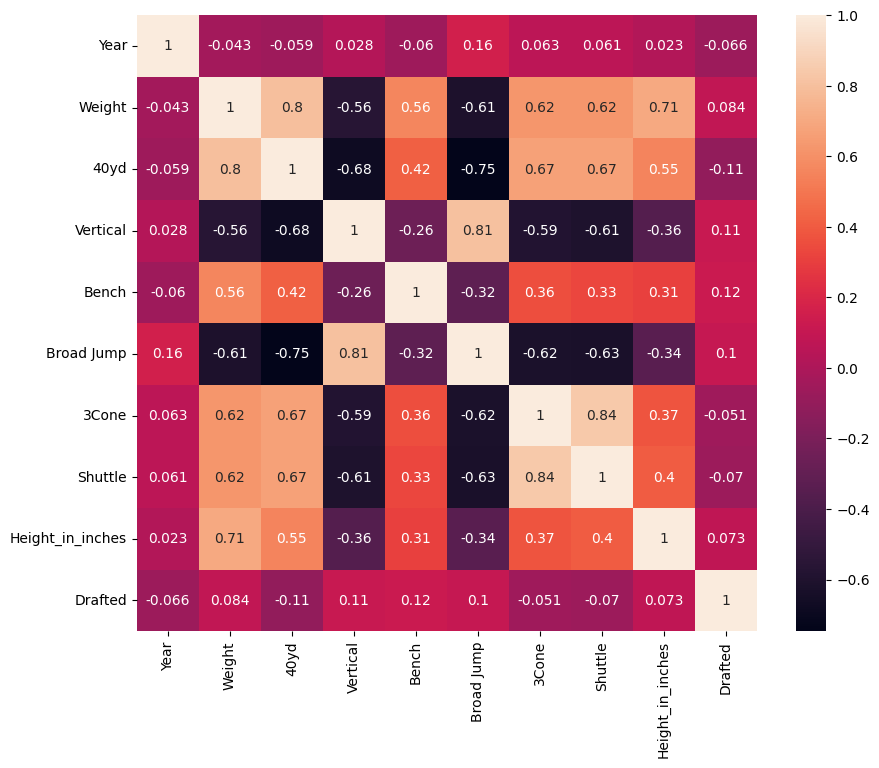

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_df_imputed.corr(), annot=True)
plt.show()